In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH

plot_defaults()

In [2]:
base = "/work/n01/n01/sithom/adcirc-swan"
new_path = "/work/n01/n01/sithom/adcirc-swan/NWS13set"
old_path = "/work/n01/n01/sithom/adcirc-swan/NWS13example"

In [5]:
old = nc.Dataset(os.path.join(old_path, "fort.22.nc"))
old

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order:  Main 2004217N13306 2004223N11301 2004227N09314
    institution: Oceanweather Inc.
    conventions: CF-1.6 OWI-NWS12b-0.1
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, 2004217N13306, 2004223N11301, 2004227N09314

In [6]:
new = nc.Dataset(os.path.join(new_path, "fort.22.nc"))
new

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1

In [7]:
old["2004217N13306"]

<class 'netCDF4._netCDF4.Group'>
group /2004217N13306:
    rank: 2
    dimensions(sizes): time(481), yi(161), xi(161)
    variables(dimensions): float64 lat(time, yi, xi), float64 clat(time), float64 lon(time, yi, xi), float64 clon(time), int32 time(time), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [10]:
new["TC1"]["time"]

<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    axis: T
    units: minutes since 2004-08-09 00:00:00
    calendar: proleptic_gregorian
path = /TC1
unlimited dimensions: 
current shape = (481,)
filling on, default _FillValue of -9223372036854775806 used

In [12]:
old["2004217N13306"]["time"]

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    _FillValue: -2147483647
    units: minutes since 1990-01-01 01:00:00 Z
    axis: T
    coordinates: time
path = /2004217N13306
unlimited dimensions: time
current shape = (481,)
filling on

In [13]:
newer = nc.Dataset(os.path.join(new_path, "fort.22.new.nc"))
newer

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main

In [15]:
blank = nc.Dataset(os.path.join(new_path[:-3] + "blank", "fort.22.nc"))
blank

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1

In [18]:
blank["Main"]["time"]

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    _FillValue: -2147483647
    axis: T
    coordinates: time
    units: minutes since 1990-01-01T01:00:00+00:00
    calendar: proleptic_gregorian
path = /Main
unlimited dimensions: time
current shape = (673,)
filling on

In [19]:
blank["TC1"]["time"]

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    _FillValue: -2147483647
    axis: T
    coordinates: time
    units: minutes since 1990-01-01T01:00:00+00:00
    calendar: proleptic_gregorian
path = /TC1
unlimited dimensions: time
current shape = (481,)
filling on

In [20]:
newest = nc.Dataset(os.path.join(new_path, "fort.22.new2.nc"))
newest

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1

In [23]:
newest["Main"]["time"]

<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    axis: T
    units: minutes since 1990-01-01T01:00:00
    calendar: proleptic_gregorian
path = /Main
unlimited dimensions: 
current shape = (673,)
filling on, default _FillValue of -9223372036854775806 used

In [24]:
newest["TC1"]["time"]

<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    axis: T
    units: minutes since 1990-01-01T01:00:00
    calendar: proleptic_gregorian
path = /TC1
unlimited dimensions: 
current shape = (481,)
filling on, default _FillValue of -9223372036854775806 used

In [31]:
np.all(blank["TC1"]["time"][:] == newest["TC1"]["time"][:])

True

In [33]:
np.all(old["2004217N13306"]["time"][:] == newest["TC1"]["time"])

True

In [34]:
old

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order:  Main 2004217N13306 2004223N11301 2004227N09314
    institution: Oceanweather Inc.
    conventions: CF-1.6 OWI-NWS12b-0.1
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, 2004217N13306, 2004223N11301, 2004227N09314

In [35]:
newest

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1

In [36]:
newest["TC1"]["PSFC"][:].shape

<class 'netCDF4._netCDF4.Variable'>
float32 PSFC(time, yi, xi)
    _FillValue: nan
    units: mb
    coordinates: lat lon
path = /TC1
unlimited dimensions: 
current shape = (481, 161, 161)
filling on

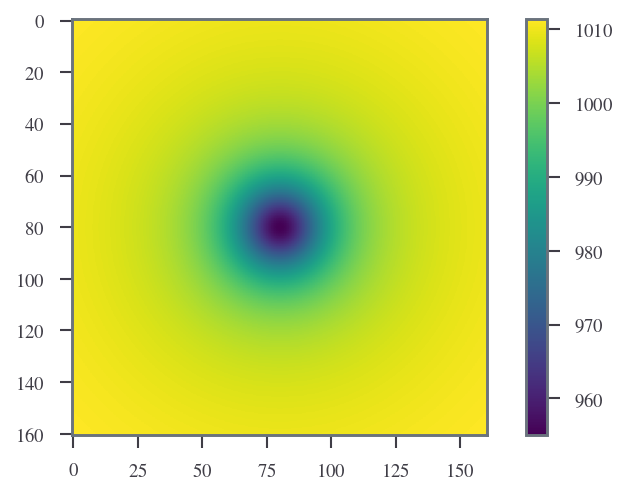

In [38]:
plt.imshow(newest["TC1"]["PSFC"][0, :, :])
plt.colorbar()

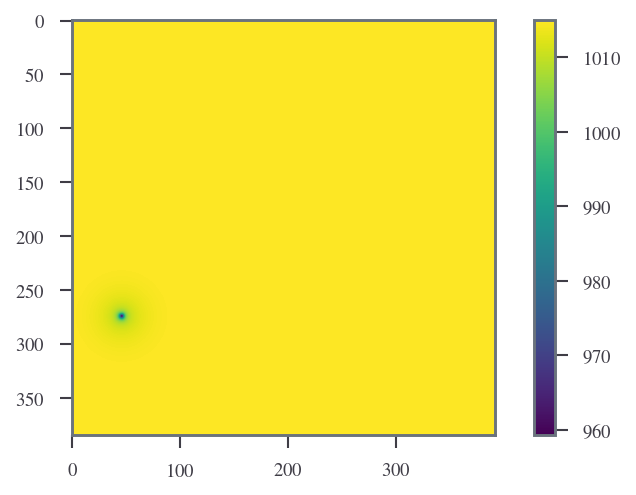

In [45]:
plt.imshow(newest["Main"]["PSFC"][600, :, :])
plt.colorbar()

In [43]:
newest["Main"]["PSFC"]

<class 'netCDF4._netCDF4.Variable'>
float32 PSFC(time, yi, xi)
    _FillValue: nan
    units: mb
    coordinates: lat lon
path = /Main
unlimited dimensions: 
current shape = (673, 385, 393)
filling on

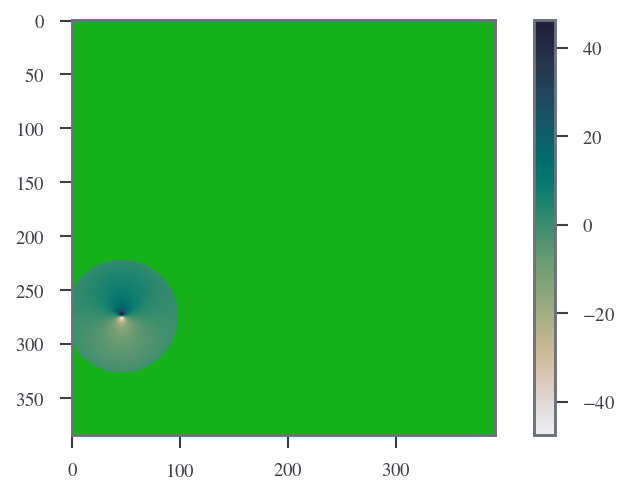

In [51]:
from sithom.plot import cmap

plt.imshow(newest["Main"]["U10"][600, :, :], cmap=cmap("rain"))
plt.colorbar()

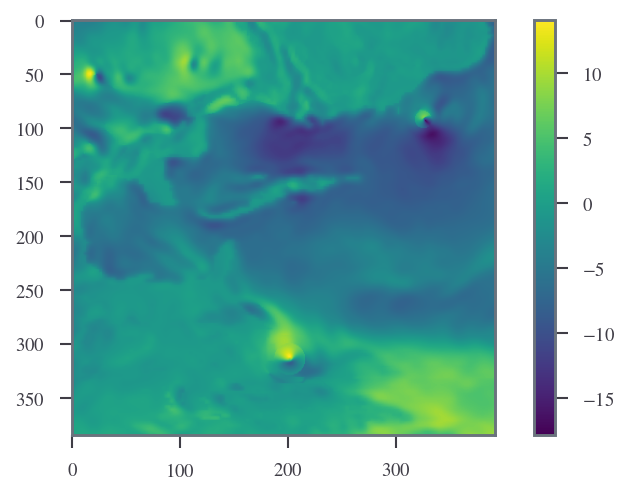

In [49]:
plt.imshow(blank["Main"]["U10"][600, :, :])
plt.colorbar()

In [53]:
filled = nc.Dataset("/work/n01/n01/sithom/adcirc-swan/NWS13set2/fort.22.nc")

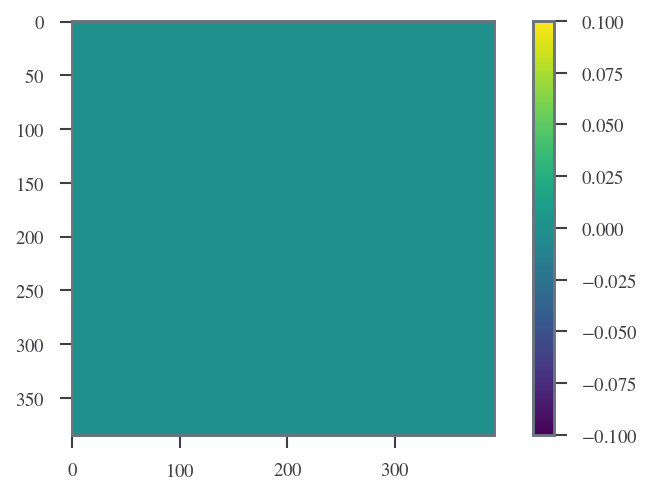

In [59]:
plt.imshow(filled["Main"]["U10"][300, :, :])
plt.colorbar()

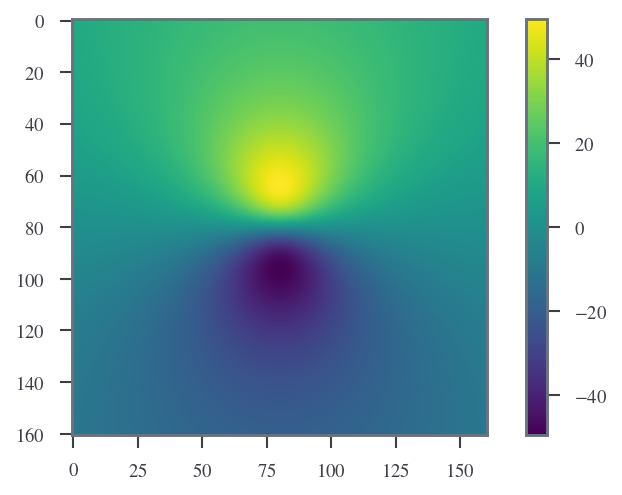

In [61]:
plt.imshow(filled["TC1"]["U10"][300, :, :])
plt.colorbar()

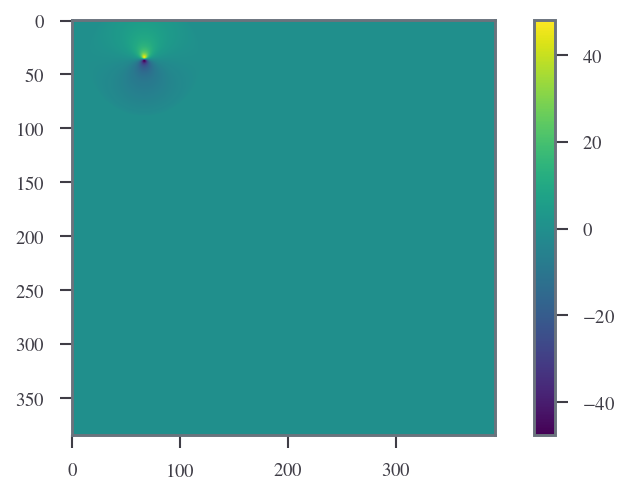

In [64]:
plt.imshow(filled["Main"]["U10"][600, :, :])
plt.colorbar()

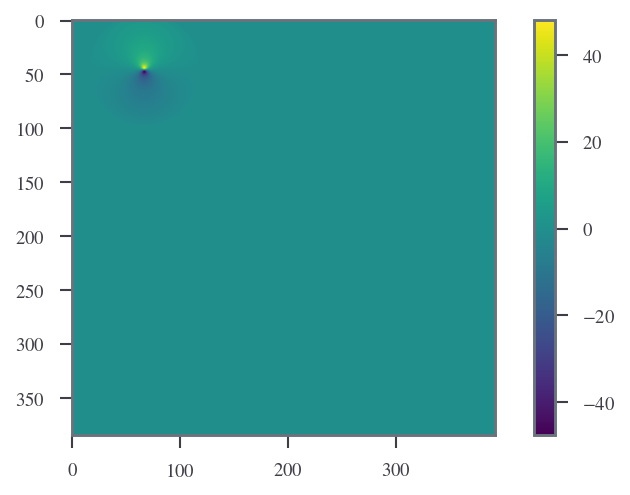

In [67]:
plt.imshow(filled["Main"]["U10"][620, :, :])
plt.colorbar()

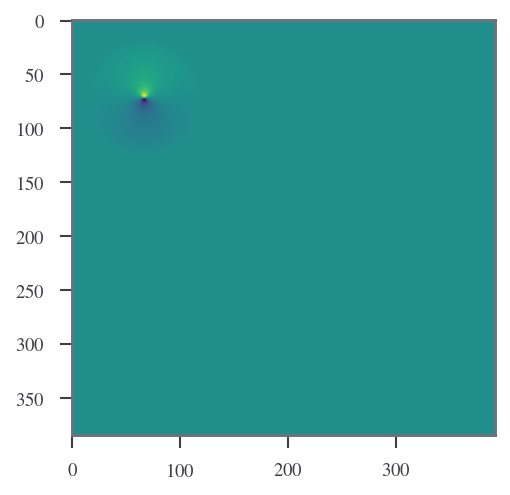

In [71]:
plt.imshow(filled["Main"]["U10"][672])